<h1 style="text-align:center">
    Estadísticas de Accidentes en Madrid
</h1>

<br>

<font color="darkblue">

<h3 style="text-align:center">
   Laura Cecilia Pineros 
</h3>
    
<h3 style="text-align:center">
    27 de Enero 2022
</h3>

<hr>

## Introducción


<font color="darkblue"> Este proyecto se desarrolla en Python(Anaconda/Jupyter Notebook) y el objetivo de este, es desarrollar un análisis básico de datos sobre accidentes de tráfico de la Comunidad de Madrid cuyo archivo corresponde a "2020_Accidentalidad.csv". He conseguido conocer y profundizar más sobre las funciones básicas para el tratamiento de datos, así mismo, he considerado importantes ciertas librerías muy afínes para la Ciencia de datos (numpy, pandas, matplolib), he conocido más sobre estructuras de control, que hasta el momento tenía ciertas dificultades, pero que he intentado sobrepasar con dichos ejercicios. Reconozco que solo con la práctica se pueden lograr optimizar dichos códigos, como también, que la programación complementa y es una herramienta fundamental para llevar a cabo ciertas conclusiones científicas, pero lo más importante es como procesamos y analizamos la información, puesto que, el código en si mismo cobra sentido entiendo lo que quiere decir línea tras línea. 

## a) Algunas operaciones sencillas [2 puntos]

Vamos a trabajar con una tabla del INE que contiene información sobre el paro en España. Abriendo el archivo, vemos algo así:

<center>
    <img src="./images/tabla_1.png" width="800">
</center>

Si miramos una línea de esta tabla (salvo la primera, que es la cabecera), encontamos lo siguiente:
    
<table>
  <tr>
    <th>2020S000073</th>
    <th>01/01/2020</th>
    <th>18:48</th>
    <th>AVDA. PIO XII</th>
    <th>81</th>
    <th>CHAMARTÍN</th>
    <th>Atropello a persona</th>
    <th>Despejado</th>
    <th>Turismo</th>
    <th>Conductor</th>
    <th>DE 55 A 59 AÑOS</th>
    <th>Hombre</th>
    <th>14</th>
    <th> </th>
  </tr>
</table>

Pero si inspeccionamos el archivo con un editor de texto, vemos que esa línea es como sigue:

    2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;

Una cadena de caracteres. Hagamos en Python algunas operaciones básicas con los algunos de los datos anteriores y con la cadena en sí.

**a.1 Redondeo de la hora**

La primera operación consiste en redondear una hora, simplemente despreciando los minutos y dando lugar al entero correspondiente, entre 0 y 23. 

In [447]:
# Esta celda debe ser completada por el estudiante
def redondeo_hora(x):
    h, m = x.split(':')#devuelve una lista de palabras usando sep como cadena de separación.
    return int(h) 

In [448]:
# Pruebas de funcionamiento:
print(redondeo_hora('12:48'))

12


Es bastante habitual hacer varias pruebas a la vez:

In [449]:
# Pruebas de funcionamiento:
for h in ['15:00', '23:15', '14:22']:#recorrido sobre la lista para aplicar la funcion 
    print(redondeo_hora(h))

15
23
14


**a.2 Rangos de edad**

Ahora, deseamos codificar los rangos de edad, asignando a cada rango descrito un intervalo de dos enteros. El ejemplo de funcionamiento te aclarará lo que se pide exactamente: 

In [451]:
# Esta celda debe ser completada por el estudiante
#función de string a tuplas con enteros max y min. 
def rango_edad(x):
    if x.split(' ')[0] =='DE':
        return (int(x.split(' ')[1]),int(x.split(' ')[3]))
    elif x.split(' ')[0] =='DESCONOCIDA':
        return ('(-1,-1)')
    elif x.split(' ')[0] == 'MAYOR':
        return (int(x.split(' ')[2])+1,100)
    else:
        "none" 

In [452]:
# Pruebas de funcionamiento:

for c in  ['DE 25 A 29 AÑOS', 'DESCONOCIDA','MAYOR DE 74 AÑOS']:
    print(c, " -> ", rango_edad(c))


DE 25 A 29 AÑOS  ->  (25, 29)
DESCONOCIDA  ->  (-1,-1)
MAYOR DE 74 AÑOS  ->  (75, 100)


**a.3 Lesividad: datos en blanco**

El dato de lesividad viene codificado con un entero:

    01 Atención en urgencias sin posterior ingreso. - LEVE
    02 Ingreso inferior o igual a 24 horas - LEVE
    ...
    77 Se desconoce
    En blanco Sin asistencia sanitaria
    
Deseamos convertir este dato en un número entero. Cuando no se requiere asistencia sanitaria vamos a codificar esto con el entero 0 por homogeneidad. Cuando la lesividad no se conoce (un dato missing por ejemplo), también la consignaremos con un cero.

In [453]:
# Esta celda debe ser completada por el estudiante
#funcion lesividad convierte un dato a entero cuyo dato missing es 0. 
def lesividad(c):
    if c =='':
        return 0
    else:
        return int(c)

In [454]:
# Pruebas de funcionamiento:

for c in  ['01', '02', '14', '', '77']:
    print(c, " -> ", lesividad(c))

01  ->  1
02  ->  2
14  ->  14
  ->  0
77  ->  77


**a.4 Operaciones con una línea de datos**

Si ahora abres el archivo de datos con un editor de texto, podrás ver algo parecido a lo siguiente:

<center>
    <img src="./images/tabla_2.png" width="800">
</center>

La línea novena es la que poníamos antes como ejemplo. Vista como una cadena de caracteres, podemos almacenarla en una variable para procesarla:


    linea_9 = "2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;"

Y luego, podríamos hacer con ella algunas operaciones básicas, separando sus piezas (con el método `split`), extrayendo alguna que nos interese (accediendo a la componente adecuada con el corchete `[...]`, y estas piezas se pueden manejar con las funciones definicas antes, `redondeo_hora` y `rango_edad`.

En una primera versión, esto puede hacerse con una función que va imprimiendo las cosas, así:

    def presentar_operaciones_basicas(cadena):
        print("La cadena de entrada: ")
        print(cadena)
        print()
        print("Piezas: ")
        ...

In [455]:
# Esta celda debe ser completada por el estudiante
#funcion presentar_operaciones_basicas, imprime una cadena de caracteres con sus respectivas posiciones haciendo uso de las 
#métodos definidos anteriormente . 
def presentar_operaciones_basicas(cadena):
    print('La cadena de entrada:',cadena, sep="\n")
    print('Piezas:', cadena.split(';'), sep="\n") 
    print('Distrito:', cadena.split(';')[5], sep="\n")
    print('La hora, sin y con redondeo:', cadena.split(';')[2],redondeo_hora(cadena.split(';')[2]), sep="\n")
    print('La edad,tal como viene y en  su rango:',cadena.split(';')[10],rango_edad(cadena.split(';')[10]), sep="\n")

In [456]:
# Ejemplo de funcionamiento:

linea_9 = "2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;"
presentar_operaciones_basicas(linea_9)

La cadena de entrada:
2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;
Piezas:
['2020S000073', '01/01/2020', '18:48', 'AVDA. PIO XII', '81', 'CHAMARTÍN', 'Atropello a persona', 'Despejado', 'Turismo', 'Conductor', 'DE 55 A 59 AÑOS', 'Hombre', '14', '', '']
Distrito:
CHAMARTÍN
La hora, sin y con redondeo:
18:48
18
La edad,tal como viene y en  su rango:
DE 55 A 59 AÑOS
(55, 59)


Decíamos que, en una primera versión, esto puede hacerse con una función que va imprimiendo las cosas. 
Pero realmente, no es el estilo deseable. Preferimos una función que no escriba nada, que devuelva su resultado con `return`. Y de paso, que devuelva únicamente las piezas que nos interesan, por ejemplo: la hora (redondeada), el distrito, el estado meteorológico, el rango de edad y el nivel (entero) de lesividad del accidente.

(Lógicamente, según el objetivo que nos interese, podría ser necesario luego cargar unos campos u otros.)

In [457]:
# Esta celda debe ser completada por el estudiante
#función extraer_datos que devuleve resultado con return 
def extraer_datos(cadena):
    elementos=cadena.split(';')
    hora=int(redondeo_hora(elementos[2]))
    distrito=elementos[5]
    tiempo=elementos[7]
    edad=rango_edad(elementos[10])
    lesion=lesividad(elementos[12])
    cadena_datos=(hora,distrito,tiempo,edad,lesion)
    return(list(cadena_datos))

In [458]:
# Pruebas de funcionamiento:
print(len(linea_9.split(";")))
print(extraer_datos(linea_9))

15
[18, 'CHAMARTÍN', 'Despejado', (55, 59), 14]


## b) Lectura de datos del archivo [2 puntos]

En este apartado te planteo diseñar tres funciones de lectura de datos.

**b.1. Cabecera** La primera función leerá la cabecera del archivo de datos, esto es, su primera línea, y la descompondrá en los rótulos correspondientes a cada columna. Además de abrir el archivo (preferiblemente con la instrucción `with open...`), bastará con un único `readline`.

In [459]:
# Esta celda debe ser completada por el estudiante
#funcion cargar cabecera(títulos) por medio de la instrucción with open 
def cargar_cabecera(archivo):
    with open(archivo, encoding = 'ISO-8859-1') as cabecera:
        cargar_cabecera = cabecera.readline()
        return(cargar_cabecera.strip().split(';'))

In [460]:
# Pruebas de funcionamiento:

cabecera = cargar_cabecera("2020_Accidentalidad.csv")
print(cabecera)


['Nº  EXPEDIENTE', 'FECHA', 'HORA', 'CALLE', 'NÚMERO', 'DISTRITO', 'TIPO ACCIDENTE', 'ESTADO METEREOLÓGICO', 'TIPO VEHÍCULO', 'TIPO PERSONA', 'RANGO DE EDAD', 'SEXO', 'LESIVIDAD*', '', '']


**b.2 Lectura de algunas líneas del archivo**

Ahora, nos interesa leer justamente los datos a partir de la cabecera, esto es algunas de las demás líneas. Una forma de saltarnos esa primera línea es usar la instrucción `next`. Pongamos que queremos leer desde la línea $17$ hasta la $23$. Podemos leer (sin procesar) $17-1$ líneas y luego, podemos leer y retener $23-17+1$ líneas.

In [461]:
# Esta celda debe ser completada por el estudiante
#Función que realiza la lectura de algunas lineas del archivo por medio de la instrucción with open , para valores por 
#por defect a,b
def cargar_lineas(archivo,a=1,b=10):
    lineas=[]
    with open(archivo,encoding = 'ISO-8859-1') as f:
        datos=f.readlines()[a:b+1]
        next(f,None)
        for i in datos:
            x=extraer_datos(i)
            lineas.append(x)
        return(lineas)
    

In [462]:
lineas_lista = cargar_lineas("2020_Accidentalidad.csv", 1, 4)

for linea in lineas_lista:
    print(linea)
    
# Si no decimos qué líneas nos interesa, se cargarán las diez primeras.
# (Esto puede hacerse con dos parámetros por defecto.)

print()

lineas_lista = cargar_lineas("2020_Accidentalidad.csv")

for linea in lineas_lista:
    print(linea)

[23, 'RETIRO', 'Despejado', (25, 29), 0]
[22, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 6]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (45, 49), 14]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (25, 29), 7]

[23, 'RETIRO', 'Despejado', (25, 29), 0]
[22, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 6]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (45, 49), 14]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (25, 29), 7]
[19, 'CENTRO', 'Despejado', '(-1,-1)', 0]
[19, 'CARABANCHEL', 'Despejado', '(-1,-1)', 14]
[19, 'CARABANCHEL', 'Despejado', (21, 24), 2]
[18, 'CHAMARTÍN', 'Despejado', (55, 59), 14]
[18, 'CHAMARTÍN', 'Despejado', (18, 20), 7]
[18, 'ARGANZUELA', '', (55, 59), 14]


**b.3 Lectura de todas las líneas del archivo**

Lo normal es desear cargar **todos** los datos de un archivo, y no sólo unas pocas líneas, excluyendo la cabecera. Al igual que en la función anterior, te pido que el resultado se dé en una lista, donde cada elemento recoge la información de una línea del archivo de datos, salvo la cabecera, pero incluyendo ahora **todas** esas líneas, sin dar opción a cuáles nos interesa, aunque luego deseemos mostrar tan solo unas pocas. Véanse ambas pruebas de funcionamiento. 

In [463]:
# Esta celda debe ser completada por el estudiante
#funcion que realiza la lectura de todas las líneas del archivo por medio de la instrucción with open 
def cargar_datos(archivo):
    lista=[]
    with open(archivo,encoding = 'ISO-8859-1') as f:
        datos=f.readlines()[1:]
        for i in datos:
            dat =extraer_datos(i)
            lista.append(dat)
        return(lista)

In [464]:
# Pruebas de funcionamiento:

datos_lista = cargar_datos("2020_Accidentalidad.csv")

for linea in datos_lista:
    print(linea)  


[23, 'RETIRO', 'Despejado', (25, 29), 0]
[22, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 6]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (45, 49), 14]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (25, 29), 7]
[19, 'CENTRO', 'Despejado', '(-1,-1)', 0]
[19, 'CARABANCHEL', 'Despejado', '(-1,-1)', 14]
[19, 'CARABANCHEL', 'Despejado', (21, 24), 2]
[18, 'CHAMARTÍN', 'Despejado', (55, 59), 14]
[18, 'CHAMARTÍN', 'Despejado', (18, 20), 7]
[18, 'ARGANZUELA', '', (55, 59), 14]
[18, 'ARGANZUELA', '', (35, 39), 14]
[16, 'HORTALEZA', 'Despejado', (40, 44), 0]
[16, 'HORTALEZA', 'Despejado', (30, 34), 0]
[16, 'HORTALEZA', 'Despejado', '(-1,-1)', 0]
[16, 'PUENTE DE VALLECAS', 'Despejado', (45, 49), 14]
[16, 'PUENTE DE VALLECAS', 'Despejado', (35, 39), 2]
[16, 'PUENTE DE VALLECAS', 'Despejado', (40, 44), 2]
[16, 'PUENTE DE VALLECAS', 'Despejado', (45, 49), 2]
[15, 'HORTALEZA', 'Despejado', (21, 24), 14]
[15, 'HORTALEZA', 'Despejado', (18, 20), 0]
[15, 'HORTALEZA', 'Despejado', '(-1,-1)', 0]
[15, 'HORTALEZA', 'De

In [465]:
# Pruebas de funcionamiento:

for linea in datos_lista[0:4]:
    print(linea)    

[23, 'RETIRO', 'Despejado', (25, 29), 0]
[22, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 6]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (45, 49), 14]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (25, 29), 7]


## c) Accidentalidad y mortalidad por edad [2 puntos]

**c.1. Accidentalidad. Cómputo básico**

Deseamos totalizar el número de accidentes de nuestra tabla por cada rango de edad. Para ello, te pido que uses un diccionario en el que la clave es el rango de edad y el valor, el total de accidentes para dicho rango de edad. Ahora, las posibilidades son dos:

1. Cada accidente actualiza el diccionario así: si ese rango de edad no está en el diccionario, se añade con un total de un accidente; si ya está, se añade una unidad más al tltal de accidentes de dicho rango de edad

2. Con un diccionario con el valor 0 por defecto.

In [466]:
#función que devuelve el total de accidentes por rango de edad, haciendo uso de la variable datos_lista 
#en el item anterior por medio de la función cargar_datos 
def totales(f):
    dic = {}
    for i in f:
        if i[3] in dic:
            dic[i[3]]+=1
        else:
            dic[i[3]]=1
    return(dic)

In [467]:
# Prueba de funcionamiento:

total_accidentes_por_edades = totales(datos_lista)

for k, e in total_accidentes_por_edades.items():
    print(k, e)

(25, 29) 3437
(21, 24) 2226
(45, 49) 3084
(-1,-1) 3962
(55, 59) 2077
(18, 20) 978
(35, 39) 3332
(40, 44) 3399
(30, 34) 3362
(50, 54) 2547
(60, 64) 1272
(65, 69) 641
(15, 17) 250
(70, 74) 427
(75, 100) 657
(0, 5) 289
(6, 9) 175
(10, 14) 305


**c.2. Accidentalidad con mortalidad**

Deseamos recopilar, para cada rango de edad, el total de accidentes registrados en nuestra tabla, junto con el número de dichos accidentes que han resultado ser mortales. El cociente (multiplicado por mil) nos dará la tasa de accidentes mortales por cada mil accidentes.

In [468]:
# Esta celda debe ser completada por el estudiante
#Función que devuelve el total de accidentes y accidentes que han terminado mortales por cada 1000 
#Cabe resaltar que tarda aprox 3 min, dado que debe hacer el recorrido de todos las estructuras For. 
#(25,29)-->rango de edad
#(3437,3)-->(numero de accidentes, tasa de accidentes por cada 1000)
def totales_mortales(lista):
    edades=[]
    cod_lev =[]
    for m in range(0,len(lista)):
        edades.append(lista[m][3])
        cod_lev.append(lista[m][4])
        
    accidentes_mortales=[]
    accidentes=[]
    for i in range(0,len(edades)):
        muertes=0
        num_accidentes=0
        for j in range(0,len(edades)):
            if edades[i]==edades[j]:
                num_accidentes +=1 
                if cod_lev[j]==4:
                    muertes+=1
        accidentes.append(num_accidentes)
        accidentes_mortales.append(muertes)
    accidentes_y_muertes_por_edades=dict()
    for k in range(0,len(edades)):
        accidentes_y_muertes_por_edades[edades[k]]=(accidentes[k],accidentes_mortales[k])
    return accidentes_y_muertes_por_edades.items()



In [469]:
# Prueba de funcionamiento:

total_accidentes_y_muertes_por_edades = totales_mortales(datos_lista)

for k, totales in total_accidentes_y_muertes_por_edades:
    print(k, totales)
    
print()

# Total accidentes mortales / 1000 accidentes, por rangos de edad:

tasa_accidentes_mortales_por_mil = [(k, m*1000/n) for k, (n, m) in total_accidentes_y_muertes_por_edades]
                                    
for k_tasa  in tasa_accidentes_mortales_por_mil:
    print(k_tasa)                           

(25, 29) (3437, 3)
(21, 24) (2226, 2)
(45, 49) (3084, 4)
(-1,-1) (3962, 0)
(55, 59) (2077, 1)
(18, 20) (978, 0)
(35, 39) (3332, 8)
(40, 44) (3399, 6)
(30, 34) (3362, 2)
(50, 54) (2547, 1)
(60, 64) (1272, 1)
(65, 69) (641, 1)
(15, 17) (250, 0)
(70, 74) (427, 1)
(75, 100) (657, 4)
(0, 5) (289, 1)
(6, 9) (175, 0)
(10, 14) (305, 0)

((25, 29), 0.8728542333430317)
((21, 24), 0.8984725965858041)
((45, 49), 1.297016861219196)
('(-1,-1)', 0.0)
((55, 59), 0.4814636494944632)
((18, 20), 0.0)
((35, 39), 2.4009603841536613)
((40, 44), 1.7652250661959399)
((30, 34), 0.594883997620464)
((50, 54), 0.39261876717707106)
((60, 64), 0.7861635220125787)
((65, 69), 1.5600624024960998)
((15, 17), 0.0)
((70, 74), 2.34192037470726)
((75, 100), 6.0882800608828)
((0, 5), 3.4602076124567476)
((6, 9), 0.0)
((10, 14), 0.0)


## d) Algunas gráficas [1.5 puntos]


**d.1 Un modelo de gráfica.** Vamos a diseñar un modelo de gráfica sencillo que nos sirva para las siguientes representaciones. Tomará como parámetro una lista de pares $(x, y)$, y opcionalmente los tres rótulos explicativos que necesitamos incluir. Además, queremos que las etiquetas de las abcisas aparezcan inclinadas, para poder luego mostrar intervalos de edad.

Las pruebas de funcionamiento te darán más información que las explicaciones que pueda yo dar aquí.  

In [470]:
# Esta celda debe ser completada por el estudiante
#Funcion representar_xxx_yyy que devuelve para n-tuplas en una lista su gáfico con sus respectivos etiquetas
#para las cuales si la lista es vacía no las coloca
import matplotlib.pyplot as plt

def representar_xxx_yyy(datos,etiquetas):
    x,y=zip(*datos)
    plt.plot(x,y)
    plt.xticks(rotation=45)
    plt.grid(1)
    
    if len(etiquetas) == 0:
        plt.show()
    else:
        plt.title(etiquetas[0])
        plt.ylabel(etiquetas[1])
        plt.xlabel(etiquetas[2])
        plt.show()


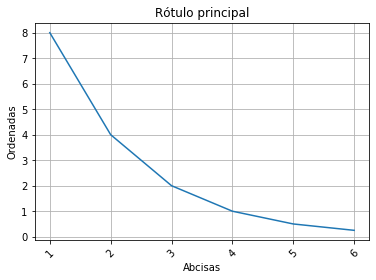

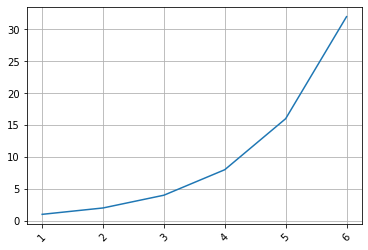

In [471]:
# Pruebas de funcionamiento:

representar_xxx_yyy([(1, 8), (2, 4), (3, 2), (4, 1), (5, 0.5), (6, 0.25)], ["Rótulo principal", "Ordenadas", "Abcisas"])

representar_xxx_yyy([(1, 1), (2, 2), (3, 4), (4, 8), (5, 16), (6, 32)], [])

**d.2. Tasas de muerte por edades** 

Queremos aplicar nuestro modelo de gráfica a la representación de las tasas de accidentes mortales por edad, que hemos calculado un poco antes. Pero obtenemos una gráfica poco adecuada, porque las edades (las abcisas) están en un orden arbitrario.

In [473]:
# Intento de representación:

#rotulos = "Tasas de muerte en accidentes por rangos de edad", "Tasas de muerte", "Rangos de edad"
#representar_xxx_yyy(tasa_accidentes_mortales_por_mil, rotulos)

Para remediar esto se ha de reordenar la lista de pares absisa-ordenada, atendiendo a las abcisas. También, el elemento de abcisa (-1, -1) se ha de suprimir. Esto es lo que te pido.

In [474]:
# Esta celda debe ser completada por el estudiante
#funcion representar_xxx_yyy devuelve la gráfica correspondiemte a la totalidad de accidentes por cada 1000. 
#Cabe resaltar que:
#   no logre eliminar el valor (-1,-1) , como tampoco logré aplicar el método sort, apesar que lo realicé con lambdafnction
#   no llegué al resultado esperado. 

rotulos =["Tasas de muerte en accidentes por rangos de edad", "Tasas de muerte", "Rangos de edad"]

def representar_xxx_yyy(data,rotulos):
    x,y =zip(*data)
    x=list(x)
    y=list(y)

    
    m=[str(i) for i in x]
    m.sort(key = lambda x: x[1])
    plt.plot(m,y)
    plt.grid(1)
    plt.xticks(rotation=45)
    
    if len(rotulos) == 0:
        plt.show()
    else:
        plt.title(rotulos[0])
        plt.ylabel(rotulos[1])
        plt.xlabel(rotulos[2])
        plt.show()

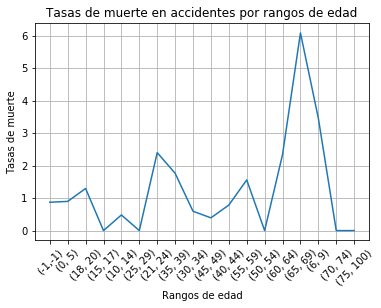

In [475]:
# Prueba de funcionamiento:

representar_xxx_yyy(tasa_accidentes_mortales_por_mil, rotulos)

**d.3. Tasas de muerte por rangos horarios** 

De forma similar a lo resuelto en los apartados anteriores, deseamos preparar los datos y un gráfico con la tasa de muerte por rangos horarios. En lugar de tratar los rangos por horas enteras (las 4 representa el intervalo entre las 4:00 y las 4:59), deseamos representar de dos en dos horas (las 4 representa el intervalo entre las 4:00 y las 5:59, las 6, entre las 6:00 y las 7:59, etc.) 

Observa que se neesitan dos fuciones, una para recopilar los datos, calcular las tasas, dar  una lista ordenada, etc., y otra para preparar las abcisas, cadenas de caracteres con las horas de dos en dos, junto con sus tasas respectivas.

In [627]:
# Esta celda debe ser completada por el estudiante
#Función que devuelve las tasas de muerte por rango_horario 
#Cabe resaltar que : 
#  no conseguí las tuplas, como tampoco la gráfica 
#(0,2)-->rango de horario
# 1.9230769230769231-->tasas de muerte
             
def totales_mortales_por_horario(data):
    lista={}
    for j in data:
        if j[0] in lista:
            if j[4]==4:
                lista[j[0]]=(lista[j[0]][0]+1,lista[j[0]][1]+1)
            else:
                lista[j[0]]=(lista[j[0]][0]+1,lista[j[0]][1])
        else:
            if j[4]==4:
                lista[j[0]]=(1,1)
            else:
                lista[j[0]]=(1,0)
    
    y=[]
    
    for i in range(len(lista)):
        if i%2==0:
            y.append([i,(lista[i][1]+lista[i+1][1])*1000/(lista[i][0]+lista[i+1][0])])
    return(y)


In [630]:
# Prueba de funcionamiento:#PENDIENTE

tasas_accidentes_y_muertes_por_horario = totales_mortales_por_horario(datos_lista)

for k, totales in tasas_accidentes_y_muertes_por_horario:
    print(k, totales)
    
print()

print(tasas_accidentes_y_muertes_por_horario)

print()

datos_para_grafica = emparejar_abcisas(tasas_accidentes_y_muertes_por_horario)

print(datos_para_grafica)

#rotulos = "Tasas de muerte en accidentes por rangos horarios", "Tasas de muerte", "Rangos horarios"
#representar_xxx_yyy(datos_para_grafica, rotulos)

0 1.9230769230769231
2 4.178272980501393
4 1.949317738791423
6 0.8635578583765112
8 1.1415525114155252
10 1.5337423312883436
12 0.8234971177600878
14 1.112099644128114
16 0.5351886540005352
18 0.4287245444801715
20 1.1999040076793857
22 1.187178472497032

[[0, 1.9230769230769231], [2, 4.178272980501393], [4, 1.949317738791423], [6, 0.8635578583765112], [8, 1.1415525114155252], [10, 1.5337423312883436], [12, 0.8234971177600878], [14, 1.112099644128114], [16, 0.5351886540005352], [18, 0.4287245444801715], [20, 1.1999040076793857], [22, 1.187178472497032]]




## e) Operaciones con dataframes [1.5 puntos]

En este apartado, vamos a trabajar con tablas de la librería `pandas`, llamadas `dataframes`.

**e1. Carga del dataframe.**
La primera operación que necesitamos es cargar el archivo de datos en una tabla, como se ve en el siguiente ejemplo.

In [679]:
# Esta celda debe ser completada por el estudiante
#Import del archivo csv.(dataframe )  por medio de la libreria pandas
import pandas as pd
tabla_pre= pd.read_csv("2020_Accidentalidad.csv", encoding = 'ISO-8859-1',sep=';')
tabla_pre

,Nº EXPEDIENTE,FECHA,HORA,CALLE,NÚMERO,DISTRITO,TIPO ACCIDENTE,ESTADO METEREOLÓGICO,TIPO VEHÍCULO,TIPO PERSONA,RANGO DE EDAD,SEXO,LESIVIDAD*,Unnamed: 13,Unnamed: 14
0,2020S000057,01/01/2020,23:15,AVDA. CIUDAD DE BARCELONA / CALL. DOCTOR ESQUERDO,-,RETIRO,Choque contra obstáculo fijo,Despejado,Turismo,Conductor,DE 25 A 29 AÑOS,Hombre,NaN,NaN,NaN
1,2020S000038,01/01/2020,22:35,CALL. VALLE DE TORANZO / CALL. SIERRA DE PAJAREJO,-,MONCLOA-ARAVACA,Caída,Despejado,Ciclomotor,Conductor,DE 21 A 24 AÑOS,Mujer,6.0,NaN,NaN
2,2020S000060,01/01/2020,20:15,GTA. MARIANO SALVADOR MAELLA,1,FUENCARRAL-EL PARDO,Caída,Despejado,Turismo,Conductor,DE 45 A 49 AÑOS,Hombre,14.0,NaN,NaN
3,2020S000060,01/01/2020,20:15,GTA. MARIANO SALVADOR MAELLA,1,FUENCARRAL-EL PARDO,Caída,Despejado,Motocicleta hasta 125cc,Conductor,DE 25 A 29 AÑOS,Hombre,7.0,NaN,NaN
4,2020S000033,01/01/2020,19:45,CALL. OLIVAR,40,CENTRO,Choque contra obstáculo fijo,Despejado,Turismo,Conductor,DESCONOCIDA,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32415,2020S019527,31/12/2020,0:18,AVDA. ALFONSO XIII / CALL. LOPEZ DE HOYOS,-,CHAMARTÍN,Colisión lateral,Despejado,Turismo,Pasajero,DE 35 A 39 AÑOS,Hombre,NaN,NaN,NaN
32416,2020S019527,31/12/2020,0:18,AVDA. ALFONSO XIII / CALL. LOPEZ DE HOYOS,-,CHAMARTÍN,Colisión lateral,Despejado,Turismo,Pasajero,DE 35 A 39 AÑOS,Hombre,NaN,NaN,NaN
32417,2020S019527,31/12/2020,0:18,AVDA. ALFONSO XIII / CALL. LOPEZ DE HOYOS,-,CHAMARTÍN,Colisión lateral,Despejado,Turismo,Conductor,DE 35 A 39 AÑOS,Hombre,NaN,NaN,NaN
32418,2020S019527,31/12/2020,0:18,AVDA. ALFONSO XIII / CALL. LOPEZ DE HOYOS,-,CHAMARTÍN,Colisión lateral,Despejado,Turismo,Pasajero,DE 35 A 39 AÑOS,Hombre,NaN,NaN,NaN


**e2. Carga del dataframe, codificando rangos de edad y lesividad.**
Ahora, queremos modificar esta lectura para que los rangos de edad se conviertan en el intervalo correspondiente. Además, vemos que el nivel de lesividad se ha leído directamente como un real, y las cadenas en blanco se han traducido a `NaN` (*Not a Number*). Queremos ponerlo como un entero, consistente en un 1 cuando hay lesividad. Cuando no se conoce la lesividad, o no hay lesividad (casos codificados con un 0, un 77, un 14), anotamos un 0 en la tabla.

In [515]:
# Esta celda debe ser completada por el estudiante
#función cargar_dataframe que devuelve modificaciones de los rangos de edad y lesividad haciendo uso del método fillna 

def cargar_dataframe(archivo):
    df=pd.read_csv("2020_Accidentalidad.csv", encoding = 'ISO-8859-1',sep=';', usecols=['HORA','DISTRITO','RANGO DE EDAD','LESIVIDAD*'])
    df['HORA']=df['HORA'].apply(redondeo_hora)
    df['RANGO DE EDAD']=df['RANGO DE EDAD'].apply(rango_edad)
    df['LESIVIDAD*']=df['LESIVIDAD*'].fillna(value=0).astype(int).replace([1,2,3,4,5,6,7,0,77,14],[1,1,1,1,1,1,1,0,0,0])
    
    df_n=df[['HORA','DISTRITO','RANGO DE EDAD','LESIVIDAD*']]
    return df_n

In [516]:
tabla = cargar_dataframe("2020_Accidentalidad.csv")
tabla

,HORA,DISTRITO,RANGO DE EDAD,LESIVIDAD*
0,23,RETIRO,"(25, 29)",0
1,22,MONCLOA-ARAVACA,"(21, 24)",1
2,20,FUENCARRAL-EL PARDO,"(45, 49)",0
3,20,FUENCARRAL-EL PARDO,"(25, 29)",1
4,19,CENTRO,"(-1,-1)",0
...,...,...,...,...
32415,0,CHAMARTÍN,"(35, 39)",0
32416,0,CHAMARTÍN,"(35, 39)",0
32417,0,CHAMARTÍN,"(35, 39)",0
32418,0,CHAMARTÍN,"(35, 39)",0


**e3. Tabla de número de accidentes por rangos de edad**

Nos interesa quedarnos únicamente con dos columnas: el rango de edad y el número de accidentes, formando una tabla nueva. Esta tabla debe mostrarse en orden ascendente de rango de edad.

In [517]:
# Esta celda debe ser completada por el estudiante
#funcion new_df que devuelve el número de accidentes agrupados por rango de edad
def new_df(archivo):
    df=pd.read_csv("2020_Accidentalidad.csv", encoding = 'ISO-8859-1',sep=';', usecols=['RANGO DE EDAD'])
    df['RANGO DE EDAD']=df['RANGO DE EDAD'].apply(rango_edad)
    df['NumAccs']='NumAccs'
    df.columns=['Edad','NumAccs']
    df_new=df[['Edad','NumAccs']]
    return df_new
table = new_df("2020_Accidentalidad.csv")
table1=table.groupby('Edad',as_index=False).count()
table1

,Edad,NumAccs
0,"(0, 5)",289
1,"(6, 9)",175
2,"(10, 14)",305
3,"(15, 17)",250
4,"(18, 20)",978
5,"(21, 24)",2226
6,"(25, 29)",3437
7,"(30, 34)",3362
8,"(35, 39)",3332
9,"(40, 44)",3399


Esta tabla contiene el rango de edad $(-1, -1)$, que no nos interesa. Por eso preferimos descartar esta fila.

In [518]:
# Esta celda debe ser completada por el estudiante
#Se elimina el rango de edad por medio del método drop()
table2=table1.drop(17,axis=0)
table2

,Edad,NumAccs
0,"(0, 5)",289
1,"(6, 9)",175
2,"(10, 14)",305
3,"(15, 17)",250
4,"(18, 20)",978
5,"(21, 24)",2226
6,"(25, 29)",3437
7,"(30, 34)",3362
8,"(35, 39)",3332
9,"(40, 44)",3399


**e4. Accidentes con consecuencias médicas.**

Queremos totalizar ahora los accidentes que requieren algún tipo de atención sanitaria o con resultado de muerte por cada rango de edad.

In [569]:
#funcion cargar_datacc que totaliza accidentes que requieres algun tipo de atención o que resulta en muerte, agrupado por
#rango de edad 
def cargar_datacc(data):
    datac = pd.read_csv(data, sep = ';', encoding = 'ISO-8859-1',usecols = ['HORA','DISTRITO', 'RANGO DE EDAD', 'LESIVIDAD*'])
    datac['RANGO DE EDAD'] = datac['RANGO DE EDAD'].apply(rango_edad)
    dataa = datac.drop(['HORA','DISTRITO'], axis = 1)
    datab = dataa.rename(columns = {'RANGO DE EDAD':'Edad','LESIVIDAD*':'NumAccsConLesiones'})
    result = datab.groupby('Edad',as_index=0).count()
    filtro = result.drop(17,axis=0)
    return filtro

table3=cargar_datacc("2020_Accidentalidad.csv")
table3

,Edad,NumAccsConLesiones
0,"(0, 5)",204
1,"(6, 9)",131
2,"(10, 14)",225
3,"(15, 17)",188
4,"(18, 20)",657
5,"(21, 24)",1414
6,"(25, 29)",2207
7,"(30, 34)",2081
8,"(35, 39)",1990
9,"(40, 44)",2023


**e4. Unión de dos tablas.**

Deseamos ahora combinar las dos tablas generadas, usando la columna "Edad" como pivote, al estilo de la operación `inner join` de SQL en el mundo de las bases de datos. 

In [581]:
# Esta celda debe ser completada por el estudiante
#el método merge usado para realizar la intersección entre tablas 
jointb2 = pd.merge(table2, table3, how='inner')
jointb2


,Edad,NumAccs,NumAccsConLesiones
0,"(0, 5)",289,204
1,"(6, 9)",175,131
2,"(10, 14)",305,225
3,"(15, 17)",250,188
4,"(18, 20)",978,657
5,"(21, 24)",2226,1414
6,"(25, 29)",3437,2207
7,"(30, 34)",3362,2081
8,"(35, 39)",3332,1990
9,"(40, 44)",3399,2023


**e5. Proporción de accidentes con lesiones.**

Deseamos ahora combinar las dos tablas generadas, usando la columna "Edad" como pivote, al estilo de la operación `inner join` de SQL en el mundo de las bases de datos. 

In [607]:
# Esta celda debe ser completada por el estudiante
#df2 brinda la proporción de accidentes con lesiones, basandose en el número de accidentes por rango de edad y accidentes con 
#consecuencias médicas de muerte o de asistencia 
a=table3['NumAccsConLesiones']
b=table2['NumAccs']
c=table2['Edad']
PropLesiones=(a/b)*100
df1 = pd.DataFrame({'PropLesiones': PropLesiones,'NumAccsConLesiones':table3['NumAccsConLesiones'],'NumAccs':table2['NumAccs'],'Edad':table2['Edad']})
df2=df1[['Edad','NumAccs','NumAccsConLesiones','PropLesiones']]
pivot_table= pd.pivot_table(df2, index=['Edad'])
pivot_table


,NumAccs,NumAccsConLesiones,PropLesiones
Edad,,,
"(0, 5)",289,204,70.588235
"(6, 9)",175,131,74.857143
"(10, 14)",305,225,73.770492
"(15, 17)",250,188,75.200000
"(18, 20)",978,657,67.177914
"(21, 24)",2226,1414,63.522013
"(25, 29)",3437,2207,64.212976
"(30, 34)",3362,2081,61.897680
"(35, 39)",3332,1990,59.723890


**e6. Gráfico.**

Finalmente, deseamos presentar la proporción de accidentes con lesiones por edades, por si al ver esto pudiéramos extraer alguna conclusión útil.

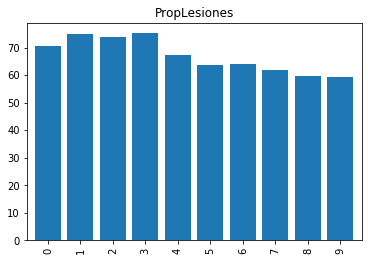

In [656]:
# Esta celda debe ser completada por el estudiante
#función que realiza gráfica de proporciones respecto número de accidentes por rango de edad y accidentes con 
#consecuencias médicas de muerte o de asistencia 
#Notemos que :
#   en el rango de edad (15,17) años hay una poca cantidad de accidentes con consecuencias médicas o de asistencia
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = df2['PropLesiones']
muestra= df[:10].copy()
muestra.plot(kind = 'bar',
             width=0.8,
             subplots=True
    );

## f) Un cálculo masivo con map-reduce [0.5 puntos]

En este apartado se ha de realizar un programa aparte que calcule, para cada rango de edad, un par de enteros con los totales de podría activarse así desde la consola:

    C:\...> python total_accs_edad.py -q 2020_Accidentalidad.csv

El programa funcionará necesariamente con la técnica map-reduce, que podemos poner en juego con la librería `mrjob`.

El funcionamiento del mismo se puede activar también desde aquí:

<font color="darkblue"> NOTE QUE: -Este punto no fue resuelto, se me dificultó y por cuestiones de tiempo no pude concretarlo. Debo documentarme más para la utilidad de Map-reduce


In [661]:
# Hagamos una llamada al programa de consola desde aquí:

! python total_accs_edad.py  -q "2020_Accidentalidad.csv" 


python: can't open file 'total_accs_edad.py': [Errno 2] No such file or directory


In [660]:
! type "2020_Accidentalidad.csv"

2020_Accidentalidad.csv: not found


In [41]:
# Para que el resultado se almacene en un archivo:

! python total_accs_edad.py -q 2020_Accidentalidad.csv  > accidentalidad_y_mortalidad_por_edades.txt

Para que pueda yo ver tu programa cómodamente desde aquí, también se puede mostrar con un comando de la consola, anteponiendo el símbolo `!`.

**Notas.** 1) La instrucción siguiente está comentada para ocultar una solución mía. 2) Desde mac o linux, se ha de usar el comando `cat`, en vez de `type`.

In [46]:
# ! type total_accs_edad.py

## g) Un apartado libre [0.5 puntos]

Dejo este apartado a tu voluntad. Inventa tú mismo el enunciado y resuélvelo, mostrando algún aspecto de programación en Python no contemplado o alguna técnica o librería que no has puesto en juego en los apartados anterioresc, relacionado con el análisis de datos o con este proyecto. He aquí dos ejemplos posibles:

- Me he quedado un poco insatisfecho con el uso de pandas, un poco escaso: este apartado adicional podría usar dicha librería poniendo en juego algunas operaciones que no hemos visto.

- Tampoco me gusta mucho el acabado de las figuras:
  la librería Plotly puede ser quizá permitirte trazar figuras más profesionales,
  y una posibilidad sencilla es quizá
  importar los datos del archivo creado por el programa de map-reduce y representarlos gráficamente.
  
Estos ejemplos pueden servirte como pista, pero que no te limiten: puedes proponer tú algo que te parezca oportuno, para mostrar algún aspecto que no se cubra bien en los apartados anteriores, relacionado con el análisis de datos o con este proyecto pero o para practicar con una librería que te parezca interesante.

In [678]:
# Este apartado debe ser completado por el estudiante

# Una funcionalidad útil que contiene pandas es heatmap con pandas(mapa de calor) 
df2.head(10).style.format({ 
                          "engine-size": "{:20,.0f} cc", 
                          "horsepower": "{:20,.0f} hp",
                          "price":"${:20,.0f}"})\
                    .background_gradient(cmap='viridis')

,Edad,NumAccs,NumAccsConLesiones,PropLesiones
0,"(0, 5)",289,204,70.588235
1,"(6, 9)",175,131,74.857143
2,"(10, 14)",305,225,73.770492
3,"(15, 17)",250,188,75.200000
4,"(18, 20)",978,657,67.177914
5,"(21, 24)",2226,1414,63.522013
6,"(25, 29)",3437,2207,64.212976
7,"(30, 34)",3362,2081,61.897680
8,"(35, 39)",3332,1990,59.723890
9,"(40, 44)",3399,2023,59.517505


In [682]:
#Otra funcionalidad que me parece útil son las instrucciones SQL Joins, pues, también podemos sacar provecho a muchas 
#conclusiones que estas arrojan 
jointb3 = pd.merge(table2, table3, how='left')
jointb3


,Edad,NumAccs,NumAccsConLesiones
0,"(0, 5)",289,204
1,"(6, 9)",175,131
2,"(10, 14)",305,225
3,"(15, 17)",250,188
4,"(18, 20)",978,657
5,"(21, 24)",2226,1414
6,"(25, 29)",3437,2207
7,"(30, 34)",3362,2081
8,"(35, 39)",3332,1990
9,"(40, 44)",3399,2023


### Datos personales

<br>

<font color="darkblue">

-   **Apellidos:** Piñeros Naranjo 
-   **Nombre:** Laura Cecilia
-   **Email:** laurac140@hotmail.com
-   **Fecha:** 27 de Enero de 2022

<br>

<font color="black">
    
### Ficha de autoevaluación

<br>

<font color="darkblue">

**Comentarios sobre la autoevaluación**: 
<font color="green">
La siguiente autoevaluación se realizó respecto a los ejercicios resueltos que corrian a la perfección y los que quedaron incompletos que en cuyo caso , todo fue documentado. 

Muchas gracias profesor por su valioso tiempo para enseñarme. Espero muy atenta una retroalimentación de la tarea. 

<font color="darkblue">
    
|Apartado|Calificación|Comentario|
|-|-|-|
|a)  |2.0  / 2.0  |Completamente resuelto |
|b)  |2.0  / 2.0  |No lo he conseguido |
|c)  |1.0 / 2.0  |Sólo he conseguido una parte mínima |
|d)  |0.6 / 1.5  |Sólo he conseguido una parte mínima |
|e)  |1.8  / 1.5  |No lo he conseguido |
|f)  |0  / 0.5  |No lo he conseguido |
|g)  |0.5  / 0.5  |No he logrado el correcto funcionamiento |
|**Total** |**7.5** / 10.0|**Suspenso**|

</font>

<font color="black">
    
### Ayuda recibida y fuentes utilizadas

<br>
    
<font color="darkblue">
... comentarios del estudiante ...

<br>

<br>

<font color="black">
    
### Comentario adicional

<br>

<font color="darkblue">
... Este apartado es optativo ...

<br>

In [45]:
# Esta celda se ha de respetar: está aquí para comprobar el funcionamiento de algunas funciones por parte de tu profesor